In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

num_pixels = 100
image_size = (num_pixels, num_pixels)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "apples",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "apples",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 6409 files belonging to 13 classes.
Using 5128 files for training.
Found 6409 files belonging to 13 classes.
Using 1281 files for validation.


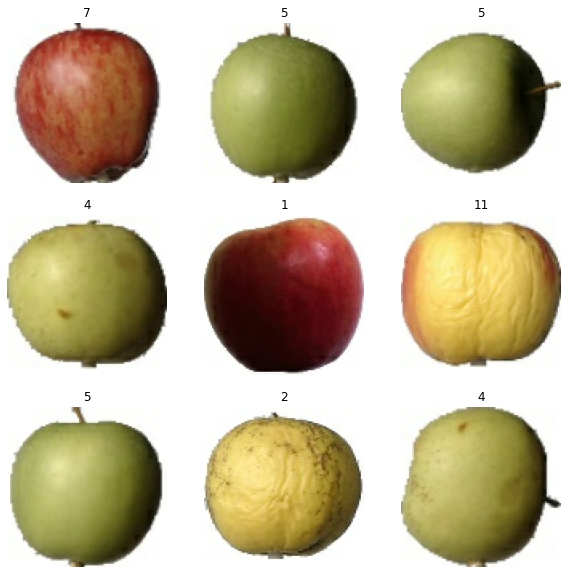

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [85]:
inputs = keras.Input(shape=(num_pixels, num_pixels, 3))
model = keras.Sequential([
    inputs,
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(13)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_28 (RandomFlip)  (None, 100, 100, 3)       0         
_________________________________________________________________
random_rotation_28 (RandomRo (None, 100, 100, 3)       0         
_________________________________________________________________
random_zoom_25 (RandomZoom)  (None, 100, 100, 3)       0         
_________________________________________________________________
rescaling_37 (Rescaling)     (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 50, 50, 64)      

In [86]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.01,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
#     callbacks=[early_stopping]
)

Epoch 1/30
161/161 [==============================] - 44s 267ms/step - loss: 1.4947 - accuracy: 0.4624 - val_loss: 0.1804 - val_accuracy: 0.9087
Epoch 2/30
161/161 [==============================] - 37s 229ms/step - loss: 0.2189 - accuracy: 0.9174 - val_loss: 0.0899 - val_accuracy: 0.9524
Epoch 3/30
161/161 [==============================] - 36s 222ms/step - loss: 0.1399 - accuracy: 0.9467 - val_loss: 0.2614 - val_accuracy: 0.8962
Epoch 4/30
161/161 [==============================] - 36s 221ms/step - loss: 0.1432 - accuracy: 0.9501 - val_loss: 0.0572 - val_accuracy: 0.9859
Epoch 5/30
161/161 [==============================] - 36s 220ms/step - loss: 0.0599 - accuracy: 0.9803 - val_loss: 0.1385 - val_accuracy: 0.9461
Epoch 6/30
161/161 [==============================] - 36s 221ms/step - loss: 0.0731 - accuracy: 0.9778 - val_loss: 0.0529 - val_accuracy: 0.9774
Epoch 7/30
161/161 [==============================] - 36s 225ms/step - loss: 0.0778 - accuracy: 0.9789 - val_loss: 0.0046 - val_ac

<AxesSubplot:title={'center':'Accuracy'}>

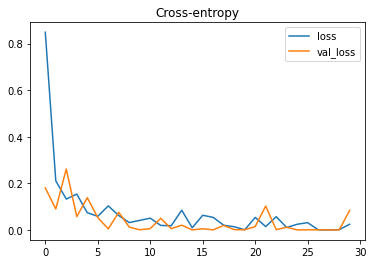

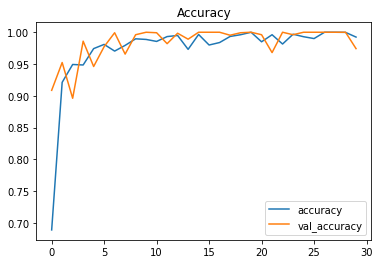

In [87]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Cross-entropy')
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Accuracy')